# CS 146 Assignment 2 :
## Call Center Modeling
### Isaac Schaal

## Preproccesing

In [84]:
# Imports
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Load the data set 
waiting_times_day = np.loadtxt('call_center.csv')

In [3]:
#Get an initial look at the data
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

Size of data set: 5891
First 3 values in data set: [5.36 2.48 8.08]
Sum of data set: 1442.145437310004


In [90]:
# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

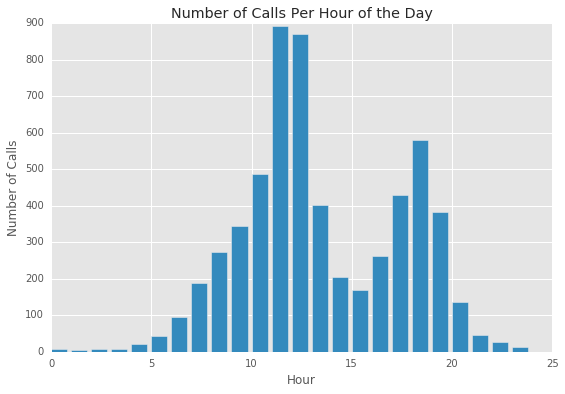

In [96]:
# Make a histogram of the calls
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.xlabel("Hour")
plt.ylabel("Number of Calls")
plt.title('Number of Calls Per Hour of the Day')
plt.show()

## Task 1: Compute Confidence Intervals and Means for Each Hour

To do this, we are using bayesian inference. We are using the exponential distribution as our prior, as we are modeling the time between events. It has 1 parameter, the rate $\lambda$.

We are using the conjugate prior of the exponential distribution, the gamma distribution, as our conjugate prior. We are using parameters $\alpha=1$ and $\beta=0.25$. We then compute the posterior distribution over $\lambda$. We do this for each of the 24 hours of the day. We then calculate a 95% confidence interval and the posterior mean of $\lambda$.

In [88]:
# Set our prior parameters
alpha_prior = 1
beta_prior = 0.25

# Create an array to store our confidence intervals (array[0]) and our means (array[1])
array = [[],[]]

# Loop through all hours of the day
for i in range(len(waiting_times_per_hour)):
    
    # Compute the posterior alpha and beta parameters, using the sufficient stats
    # of the data 
    alpha_posterior = alpha_prior + len(waiting_times_per_hour[i])
    beta_posterior = beta_prior + sum(waiting_times_per_hour[i])
    
    # Create our posterior gamma distribution
    posterior = stats.gamma(a=alpha_posterior, scale=1/beta_posterior)
    
    #Append the 95% confidence interval and mean to our array
    array[0].append((posterior.ppf(0.975) - posterior.ppf(0.025))/2)
    array[1].append(posterior.mean())

## Task 2: Plot The Results

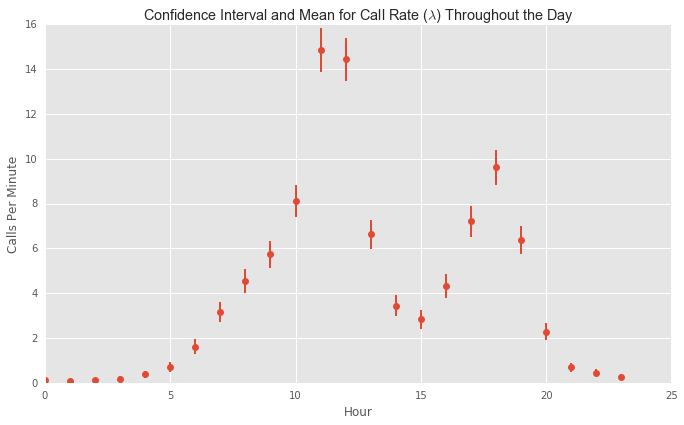

In [92]:
# Specify the data
x = np.arange(0,24,1)
y = array[1]

# Set the error bar values
yerr = array[0]

# Plot the figure
plt.figure(figsize = (10,6))
plt.errorbar(x, y, yerr=yerr, fmt='o', )
plt.xlabel("Hour")
plt.ylabel('Calls Per Minute')
plt.title("Confidence Interval and Mean for Call Rate ($\lambda$) Throughout the Day")
plt.show()

## Plot Summary
The above plot shows the approximate call rate (in calls per minute) at each hour of the day. The vertical bars show the expected range of the call rate. They are called confidence intervals, and mean that we are 95% sure that the call rate will be captured by that range. Thus, when the bar is small, we are more certain of what the call rate will be, and vice versa. If you want to find the approximate total number of calls in the hour, you can multiply the bottom and top of the bars by 60. For example, at hour 11, the bottom of the bar is at 14 and the top is at 16. Thus, the range of the total number of calls would be 14*60 = 840 to 16*60 =960. From this graph, we can see that the night time, from 8:00 PM to 6:00 AM has the lowest call rate, and is not expected to go above 2 calls per minute. From 6:00 AM to 9:00 AM, the call rate increase until it gets to 6 calls per minute. The busiest time of the day is from 10:00 AM to 1:00 PM, where the call rate reaches 15 calls per minute at the highest. There is a drop in call rate, getting to 3 calls per minute at the lowest, until 5:00 pm when the call rate again increases to around 10 call per minute at 6:00 PM. The call rate then decreases until we hit the nighttime low.

## Stretch Goals
### 1.
The pdf of the normal distribution is :  ${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

We can make the substitution  ${\displaystyle \tau={\frac {1}{\sigma^{2}}}}$ and get


${\displaystyle f(x\mid \mu ,\tau)={\sqrt {\frac {\tau }{2\pi }}}e^{-\tau (x-\mu )^{2}/2}.}$

### 2.

The pdf of the normal inverse gamma distribution is : ${\displaystyle f(x,\sigma ^{2}\mid \mu ,\lambda ,\alpha ,\beta )={\frac {\sqrt {\lambda }}{\sigma {\sqrt {2\pi }}}}\,{\frac {\beta ^{\alpha }}{\Gamma (\alpha )}}\,\left({\frac {1}{\sigma ^{2}}}\right)^{\alpha +1}\exp \left(-{\frac {2\beta +\lambda (x-\mu )^{2}}{2\sigma ^{2}}}\right)}$

We need to substitute ${\displaystyle \sigma={\frac {1}{\sqrt{\tau}}}}$

As we are transforming variables, we will also need to transform from $d\sigma$ to $d\tau$. 
To do this, we can multiply by ${\displaystyle \mid{{\frac {d\sigma}{d\tau}\mid}}}$.

As ${\displaystyle \sigma={\frac {1}{\sqrt{\tau}}}}$,

${\displaystyle \mid{{\frac {d\sigma}{d\tau}\mid}} ={\frac {1}{\tau^2}} }$ 

Thus, we make the substitution and get 

${\displaystyle f(x,\tau \mid \mu ,\lambda ,\alpha ,\beta )={\frac {\beta ^{\alpha }{\sqrt {\lambda }}}{\Gamma (\alpha ){\sqrt {2\pi }}}}\,\tau ^{\alpha +{\frac {3}{2}}}\,e^{-\beta \tau }\exp \left(-{\frac {\lambda \tau (x-\mu )^{2}}{2}}\right){\frac {1}{\tau^2}}}$

and finally

${\displaystyle f(x,\tau \mid \mu ,\lambda ,\alpha ,\beta )={\frac {\beta ^{\alpha }{\sqrt {\lambda }}}{\Gamma (\alpha ){\sqrt {2\pi }}}}\,\tau ^{\alpha -{\frac {1}{2}}}\,e^{-\beta \tau }\exp \left(-{\frac {\lambda \tau (x-\mu )^{2}}{2}}\right)}$

### 3.

The part that needs explanation is why we had to convert from ${\displaystyle \sigma={\frac {1}{\sqrt{\tau}}}}$. 
The reason is that with a random variable $X$ probability density function $f(x)$,  by definition

$P(X) = \int f(x)dx$

Thus, the pdf has an integral acting upon it.
The idea of an integral is summing over an infinite small changes in $x$, represented by $dx$. When we want to integrate with respect to our variable manipulated in some way, the same $dx$ won't work. For example, if we replace $x$ with ${x= z^2}$, we would need to be summing over small changes in $z$. To move from $dx$ to $dz$, we multiply the top and bottom by $dz$ to get ${\displaystyle {\frac {dx}{dz}}dz}$. We can replace the ${\displaystyle {\frac {dx}{dz}}}$ with the value we find by taking the derivative of ${x= z^2}$ which we find to be ${\displaystyle {\frac {dx}{dz}} = 2z}$. 

Thus, our equation becomes 

$P(X) = 2\int f(z)z dz$.

We must do the same thing when changing between random variables, and that explains why we multiply by the ${\displaystyle \mid{{\frac {d\sigma}{d\tau}\mid}}}$.



